# Shipboard ADCP Data 

## Drifter and VMP process sections 

In [1]:
import pandas as pd
import numpy as np
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import cmocean as cm
import cmocean.cm as cmo
import cartopy.feature as cfeature
from mpl_toolkits.mplot3d import axes3d
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.dates as mdates

font = {'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [2]:
ds = xr.open_dataset("os150nb.nc")

In [3]:
#can only run this once
ds['depth'] = ds['depth'].isel(time=0)
ds = ds.swap_dims({"depth_cell":"depth"})


In [4]:
def rot_ticks(axs,rot,ha):
    for xlabels in axs.get_xticklabels():
                xlabels.set_rotation(rot)
                xlabels.set_ha(ha)

## VMP Plots

VMP Cast 1

<br>
March 6 2023 - 20:59:39 <br>
March 7 2023 - 15:06:59

In [ ]:
ds

In [17]:
vmp1["u'"] = vmp1['u'] - vmp1['u'].mean('time')
vmp1["v'"] = vmp1['v'] - vmp1['v'].mean('time')

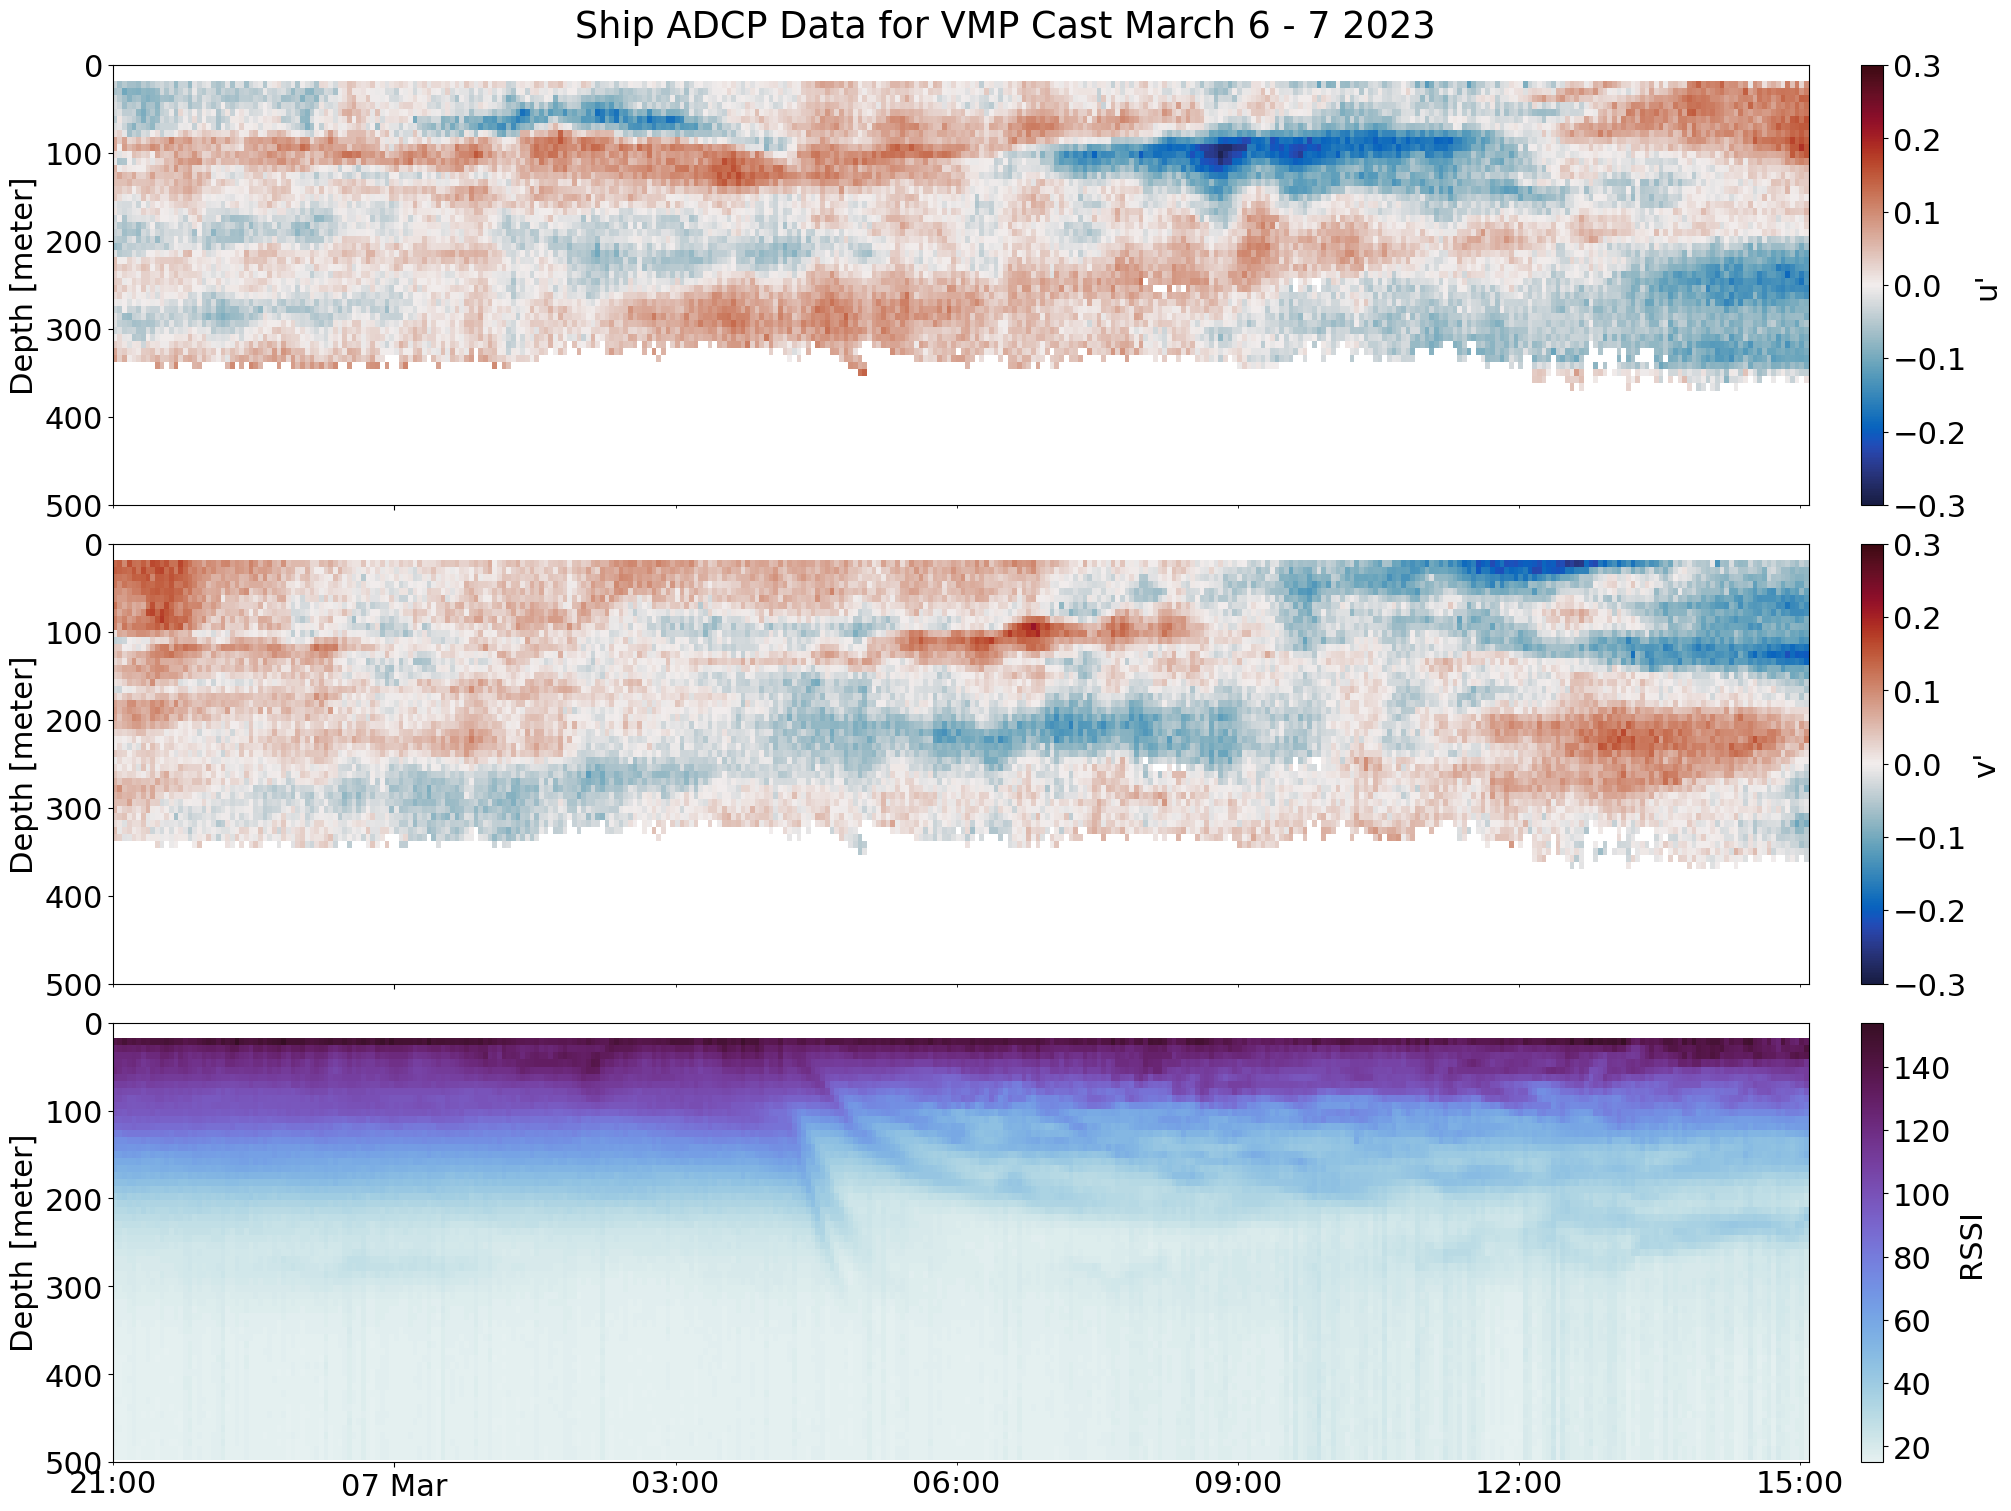

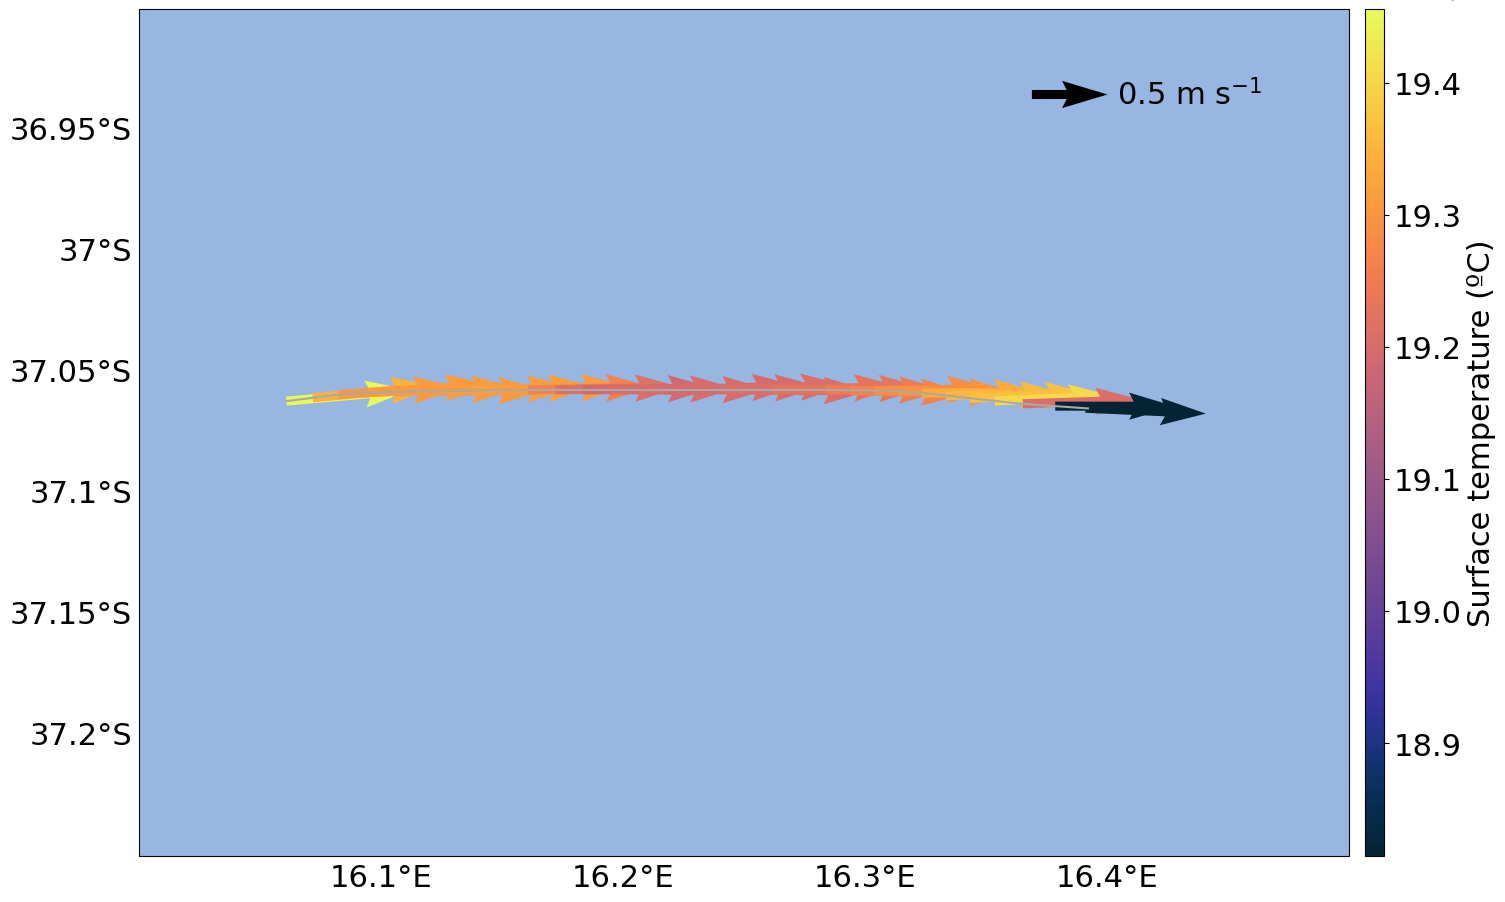

In [26]:
vmp1 = ds.sel(time=slice("2023-03-06T20:59:00", "2023-03-07T15:06:00"))
vmp1["u'"] = vmp1['u'] - vmp1['u'].mean('time')
vmp1["v'"] = vmp1['v'] - vmp1['v'].mean('time')

fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(20,15), sharex= True, constrained_layout = True)

var = ["u'", "v'"]
#vlims = [[-1.5,1.5],[-.3,.3]]
vlim = 0.3

for i, vari in enumerate(var):
    vmp1[vari].plot(y="depth", ylim=(500,0), cmap="cmo.balance", ax=[ax, bx][i],vmin=-vlim,vmax=vlim,
                    cbar_kwargs={'pad':0.01,'aspect':20}) # vmin=vlims[i][0],vmax=vlims[i][1],

vmp1["amp"].plot(y="depth", ylim=(500,0), cmap="cmo.dense", ax=cx,cbar_kwargs={'pad':0.01,'aspect':20,'label':'RSSI'})

fig.suptitle("Ship ADCP Data for VMP Cast March 6 - 7 2023")
cx.xaxis.set_major_locator(mdates.DayLocator())
cx.xaxis.set_minor_locator(mdates.HourLocator(np.arange(0,24,3)))
cx.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
cx.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
rot_ticks(cx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)
cx.set(xlabel=None)

fig, ax = plt.subplots(figsize=(20,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(vmp1.lon, vmp1.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.set_extent([16,16.5,-37.25,-36.9])
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

quivplt = vmp1.isel(time=np.arange(0,len(vmp1.time),12),
          depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                        y='lat',
                                                        u='u',
                                                        v='v',
                                                        scale=8,
                                                        pivot='tail', #make the arrow pivot on the tail
                                                        hue="tr_temp",
                                                        cmap="cmo.thermal",
                                                        cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)','aspect':45})

qk = ax.quiverkey(quivplt, 0.8, 0.9, 0.5, '0.5 m s$^{-1}$', labelpos='E',
                   coordinates='axes',zorder=6,color='k')

VMP Cast 2

<br>
March 12 2023 - 09:30:01 <br>
March 13 2023 - 07:11:46

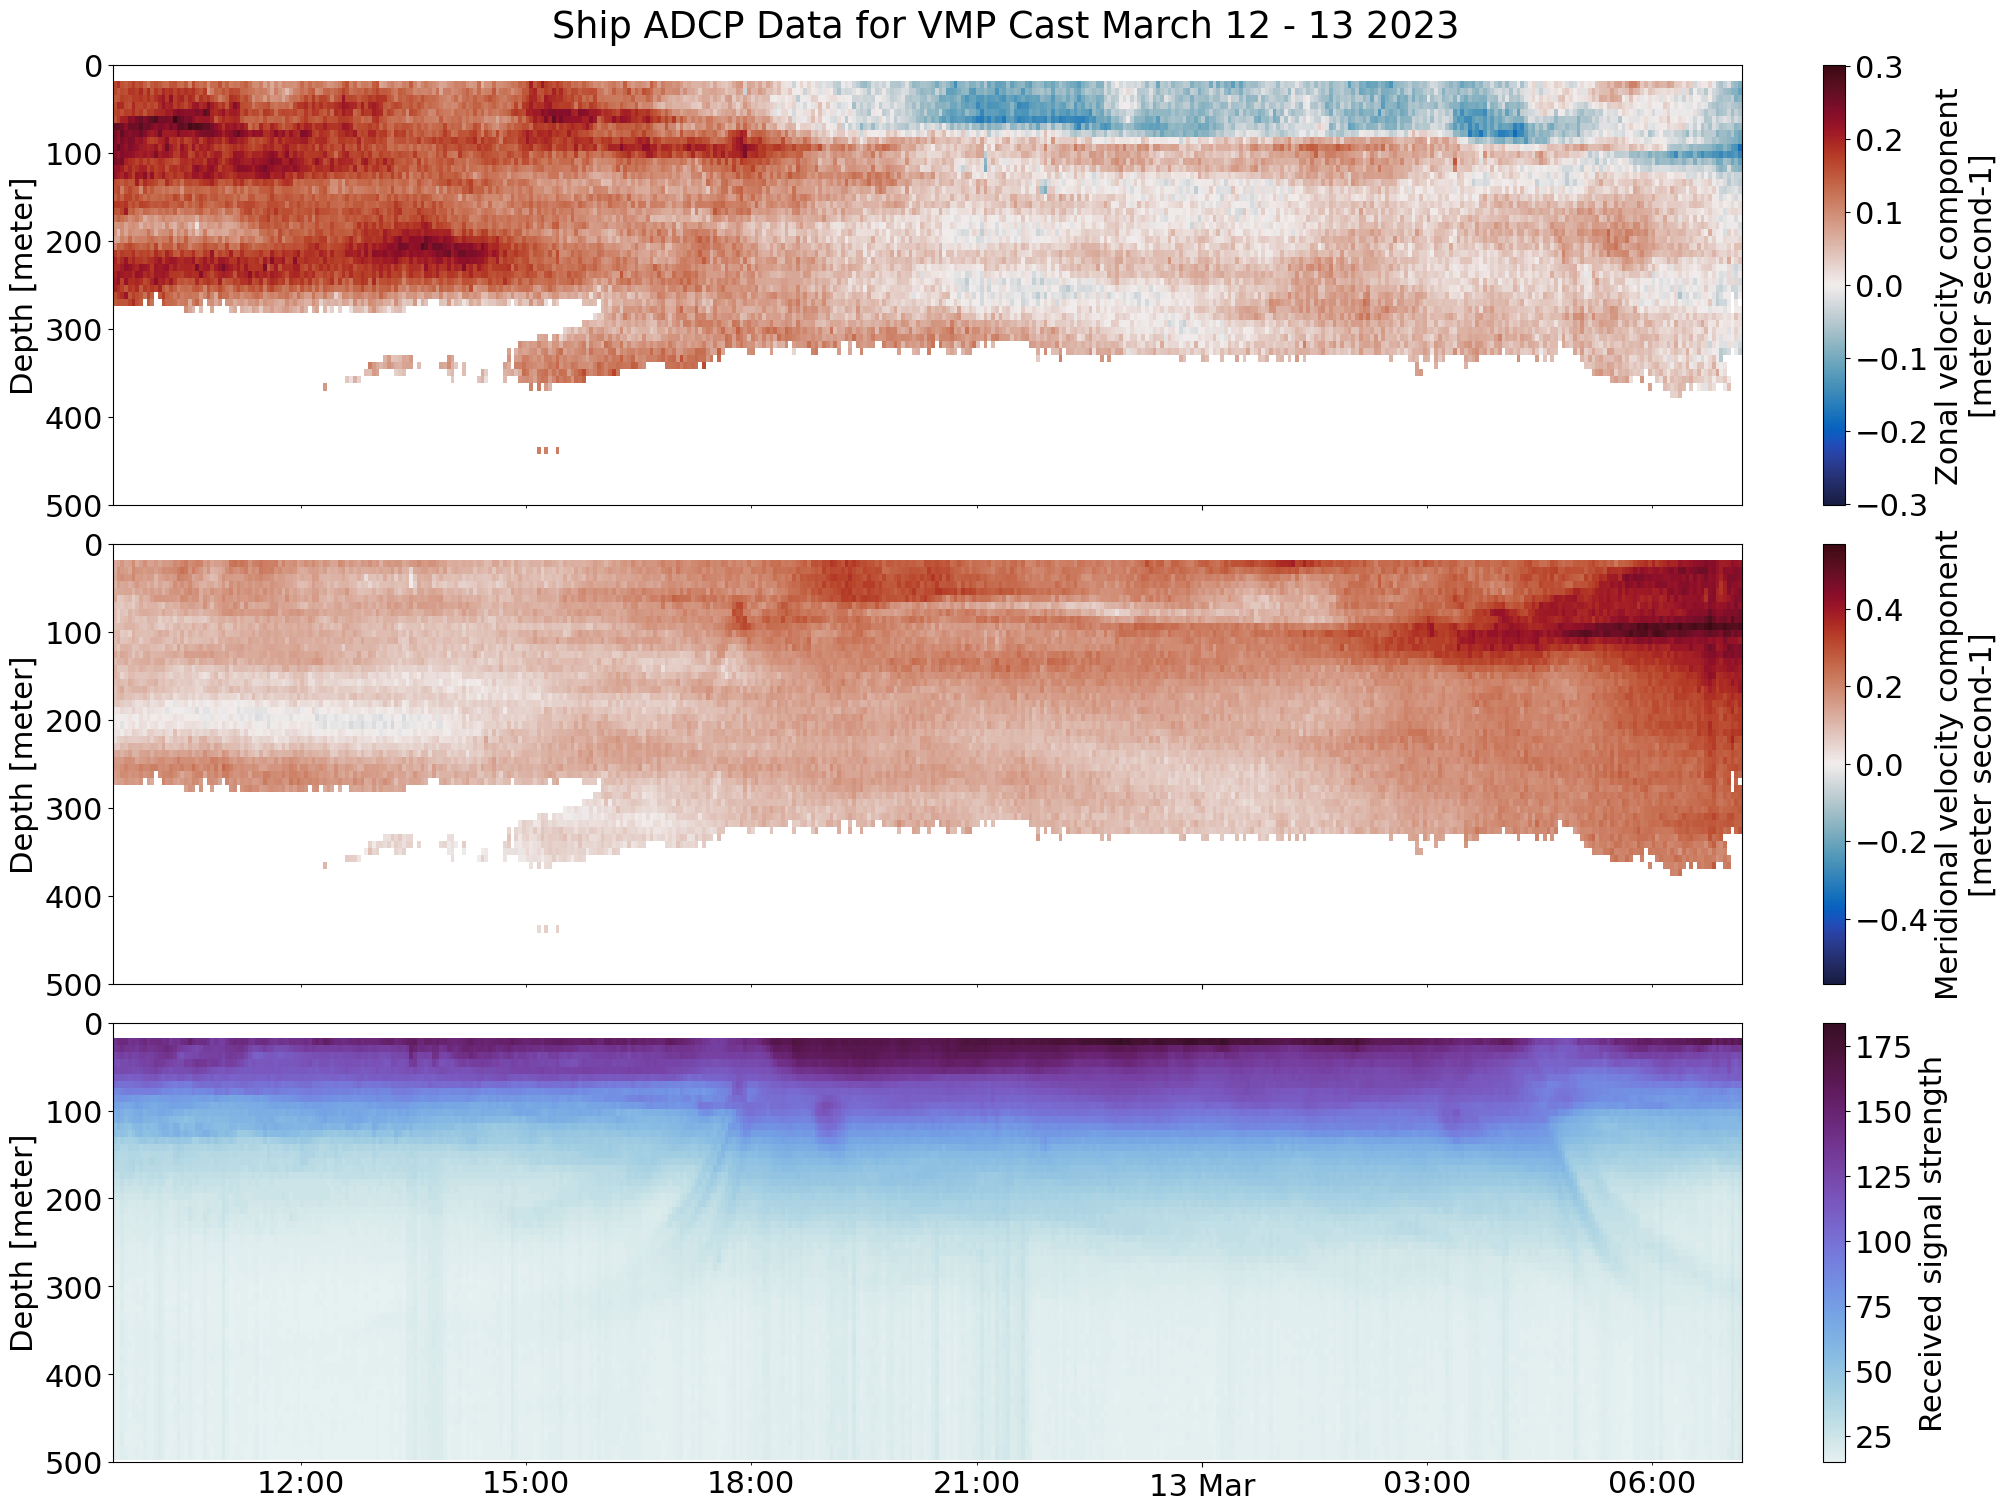

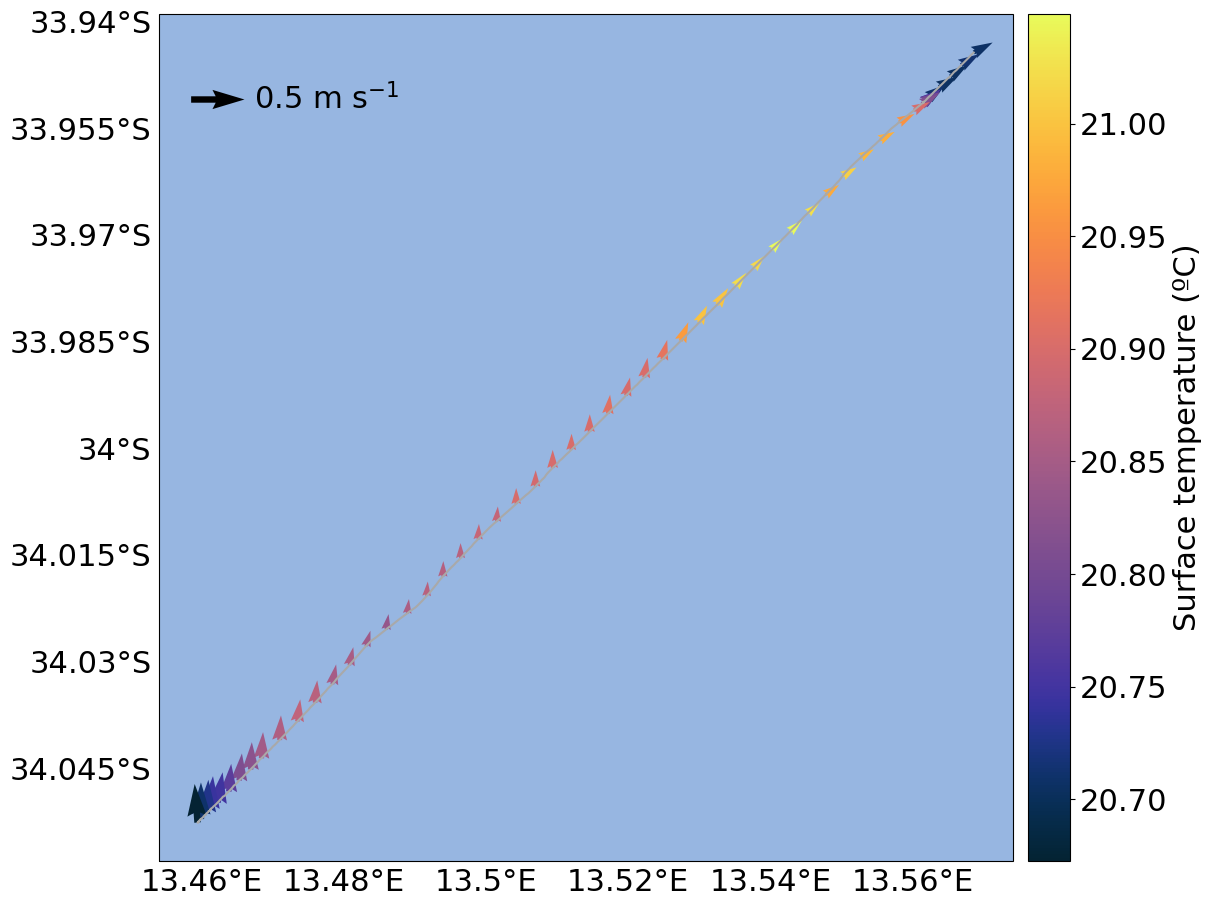

In [13]:
vmp2 = ds.sel(time=slice("2023-03-12T09:29:00", "2023-03-13T07:12:00"))


fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(20,15), sharex= True, constrained_layout = True)

var = ['u', 'v']

for i, vari in enumerate(var):
    vmp2[vari].plot(y="depth", ylim=(500,0), cmap="cmo.balance", ax=[ax, bx][i])
    #vmp1.where(vmp1['pg']>85)[vari].plot(y="depth", ylim=(500,0), vmin=-1, vmax=1, cmap="cmo.balance", ax=[ax, bx][i])

vmp2["amp"].plot(y="depth", ylim=(500,0), cmap="cmo.dense", ax=cx)
    
fig.suptitle("Ship ADCP Data for VMP Cast March 12 - 13 2023")
cx.xaxis.set_major_locator(mdates.DayLocator())
cx.xaxis.set_minor_locator(mdates.HourLocator(np.arange(0,24,3)))
cx.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
cx.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
rot_ticks(cx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)
cx.set(xlabel=None)

fig, ax = plt.subplots(figsize=(20,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(vmp2.lon, vmp2.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
quivplt = vmp2.isel(time=np.arange(0,len(vmp2.time),8),
        depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                      y='lat',
                                                      u='u',
                                                      v='v',
                                                      scale=8,
                                                      pivot='tail', #make the arrow pivot on the tail
                                                      hue="tr_temp", 
                                                      cmap="cmo.thermal",
                                                    cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)'})

qk = ax.quiverkey(quivplt, 0.1, 0.9, 0.5, '0.5 m s$^{-1}$', labelpos='E',
                   coordinates='axes',zorder=6,color='k')
#ax.set_extent([16,16.5,-37.25,-36.9])

VMP Cast 3

<br>
March 17 2023 - 19:55:02 <br>
March 17 2023 - 22:16:03

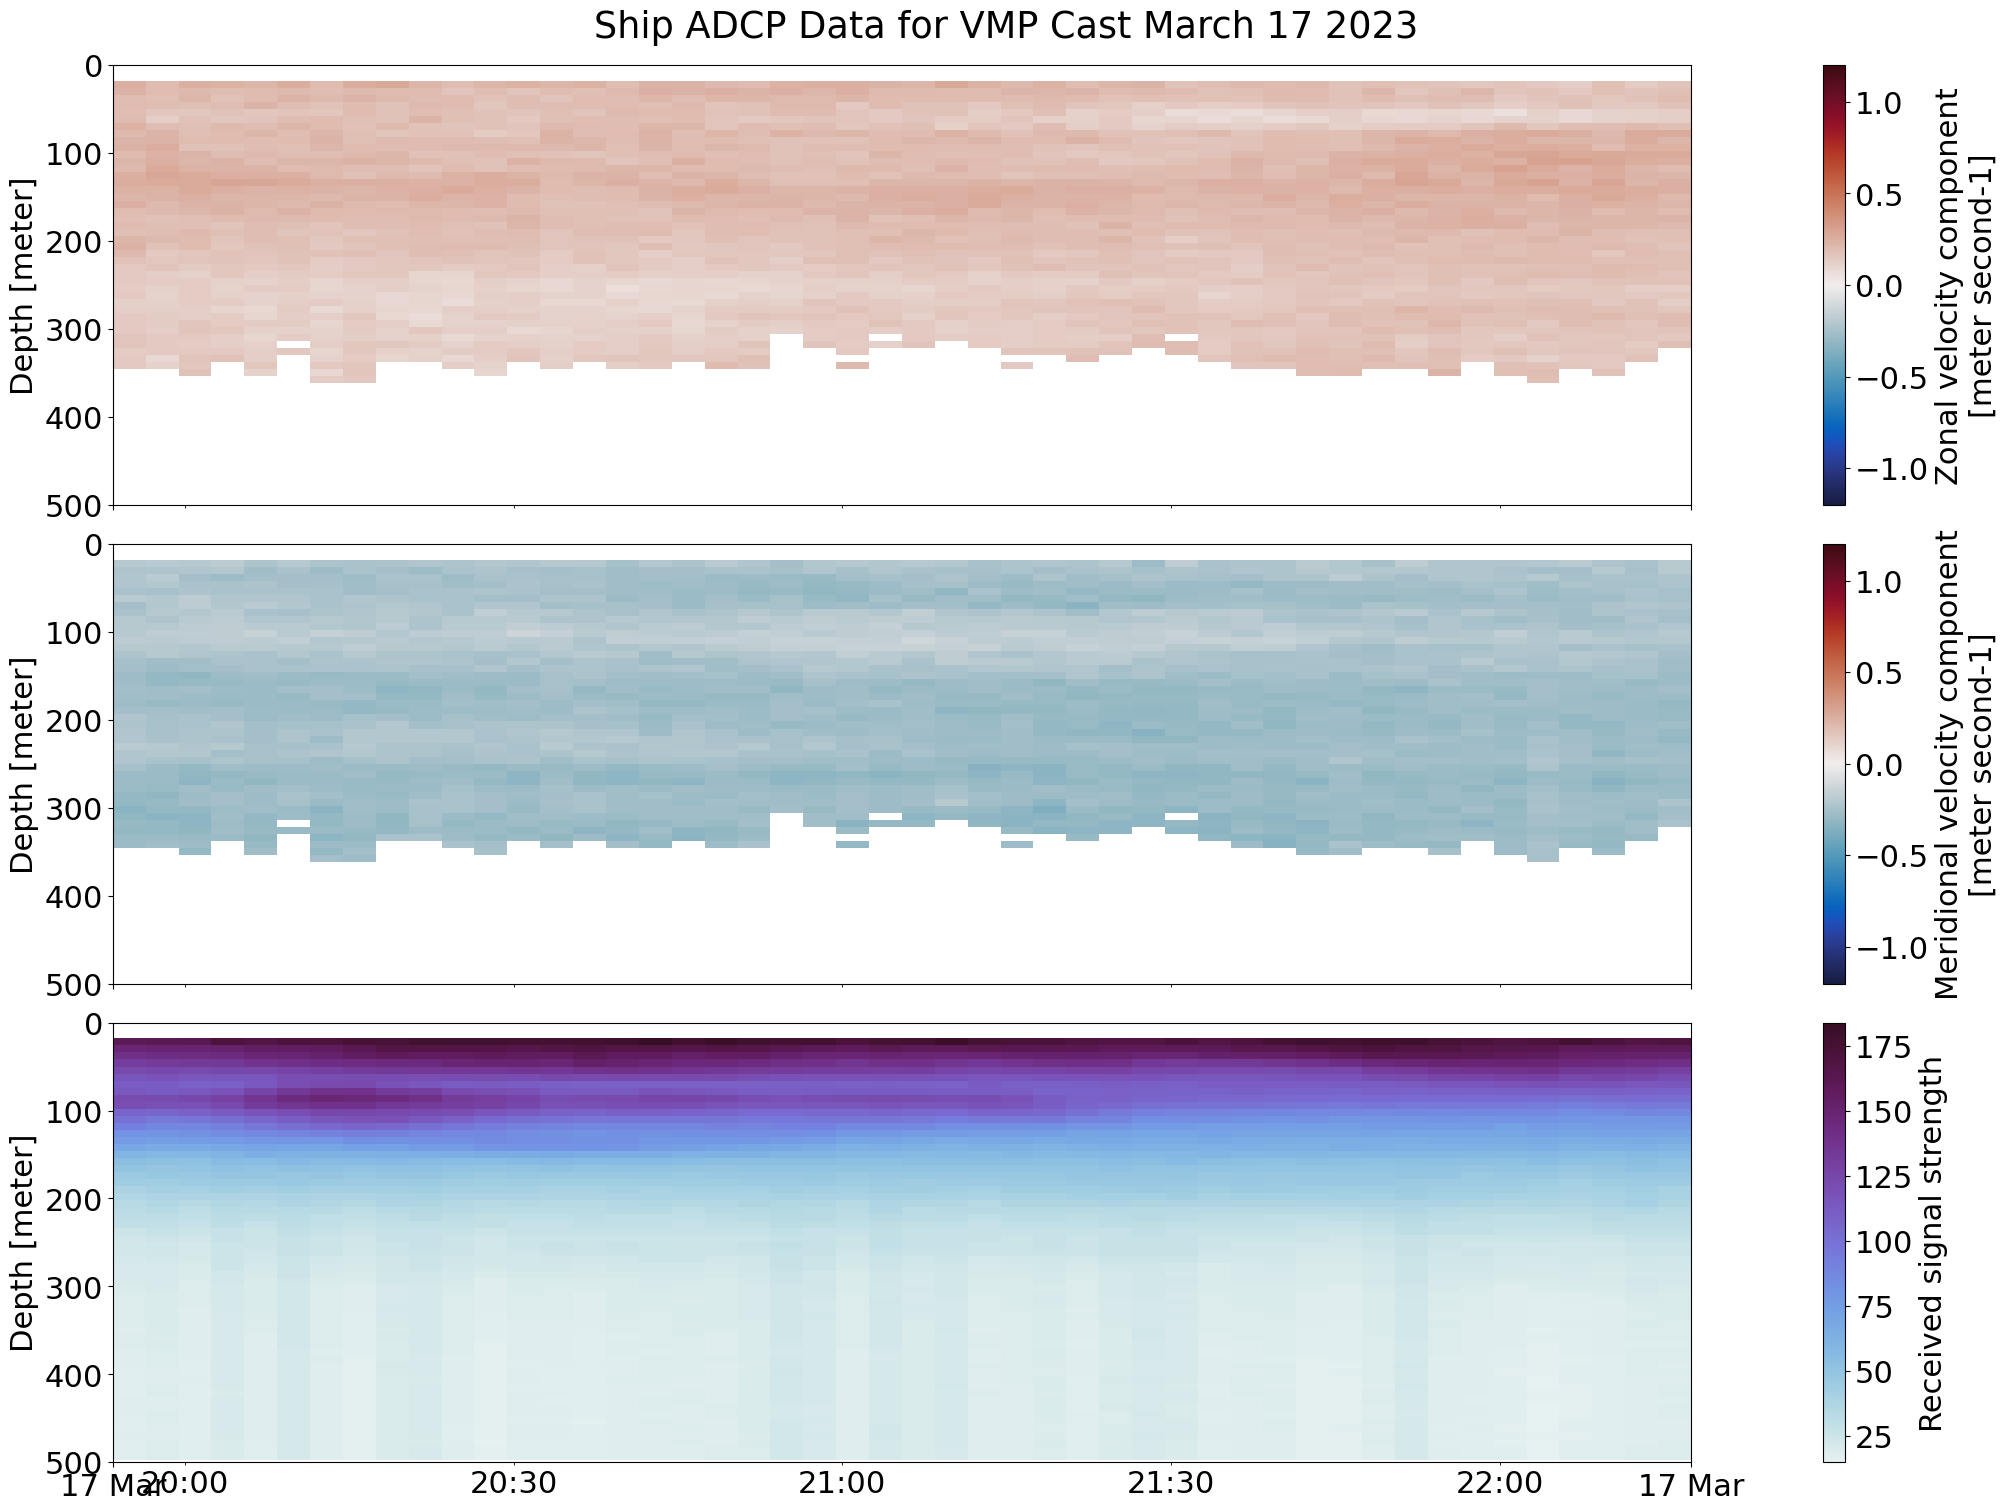

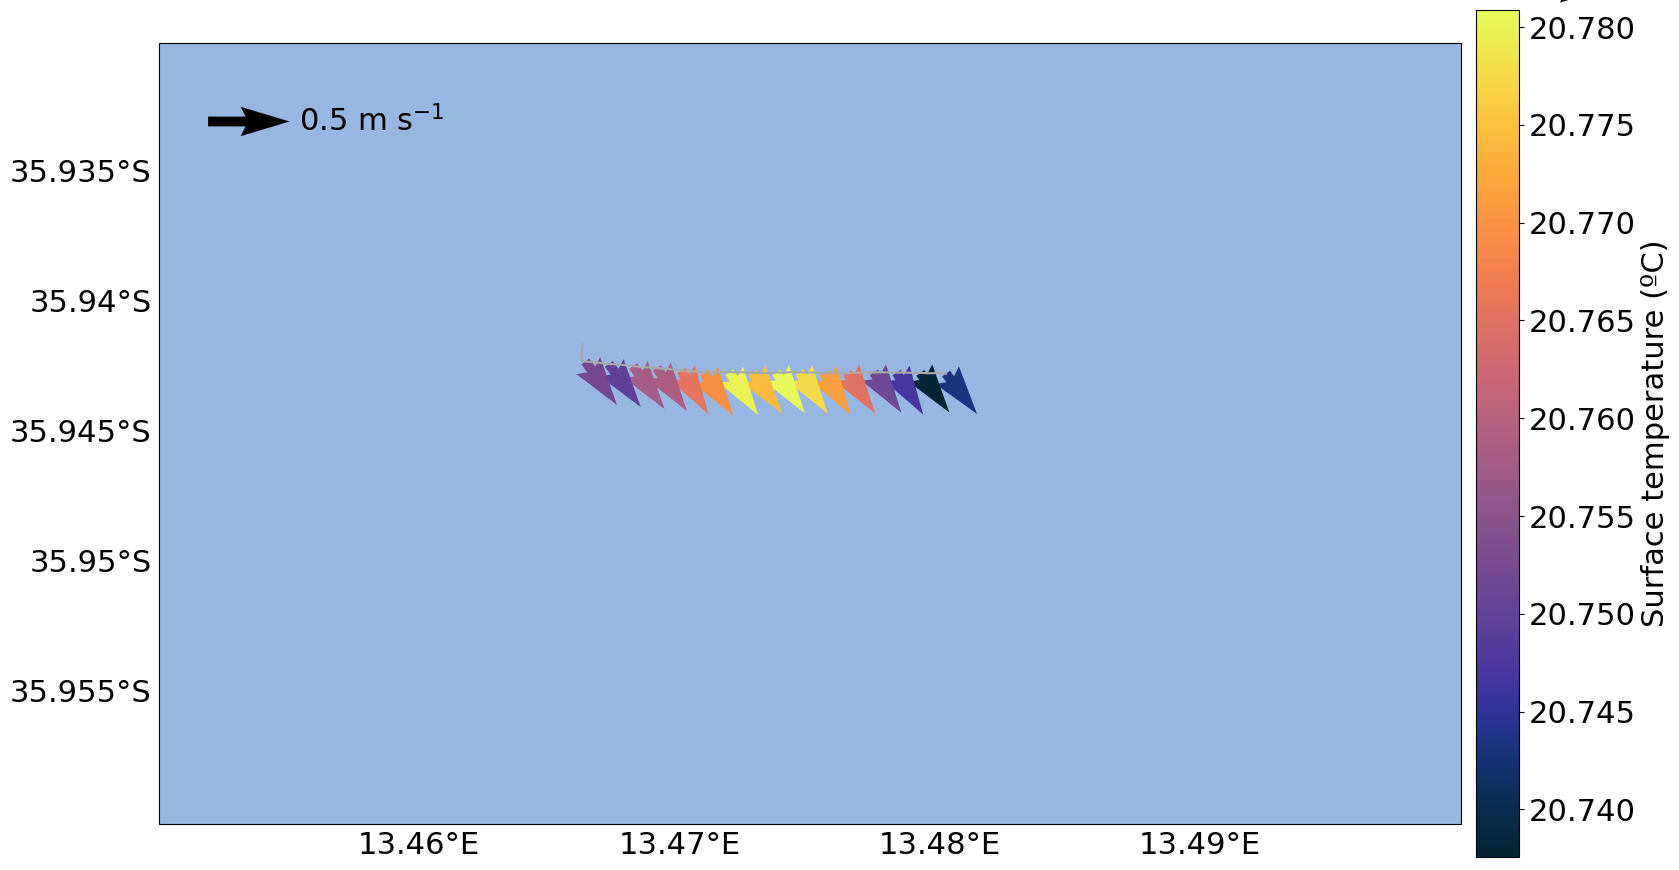

In [7]:
vmp3 = ds.sel(time=slice("2023-03-17T19:54:00", "2023-03-17T22:17:00"))


fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(20,15), sharex= True, constrained_layout = True)

var = ['u', 'v']

for i, vari in enumerate(var):
    vmp3[vari].plot(y="depth", ylim=(500,0), vmin=-1.2, vmax=1.2, cmap="cmo.balance", ax=[ax, bx][i])
    #vmp1.where(vmp1['pg']>85)[vari].plot(y="depth", ylim=(500,0), vmin=-1, vmax=1, cmap="cmo.balance", ax=[ax, bx][i])

vmp3["amp"].plot(y="depth", ylim=(500,0), cmap="cmo.dense", ax=cx)
    
fig.suptitle("Ship ADCP Data for VMP Cast March 17 2023")
    
cx.xaxis.set_major_locator(mdates.DayLocator())
cx.xaxis.set_minor_locator(mdates.MinuteLocator(np.arange(0,60,30)))
cx.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
cx.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
rot_ticks(cx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)
cx.set(xlabel=None)

fig, ax = plt.subplots(figsize=(20,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(vmp3.lon, vmp3.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
quivplt = vmp3.isel(time=np.arange(0,len(vmp3.time),3),
          depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                      y='lat',
                                                      u='u',
                                                      v='v',
                                                      scale=8,
                                                      pivot='tail', #make the arrow pivot on the tail
                                                      hue="tr_temp",
                                                      cmap="cmo.thermal",
                                                        cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)'})
ax.set_extent([13.45,13.5,-35.93,-35.96])

qk = ax.quiverkey(quivplt, 0.1, 0.9, 0.5, '0.5 m s$^{-1}$', labelpos='E',
                   coordinates='axes',zorder=6,color='k')
#ax.set_extent([16,16.5,-37.25,-36.9])

VMP Cast 4

<br>
March 19 2023 - 20:34:41 <br>
March 20 2023 - 13:09:01

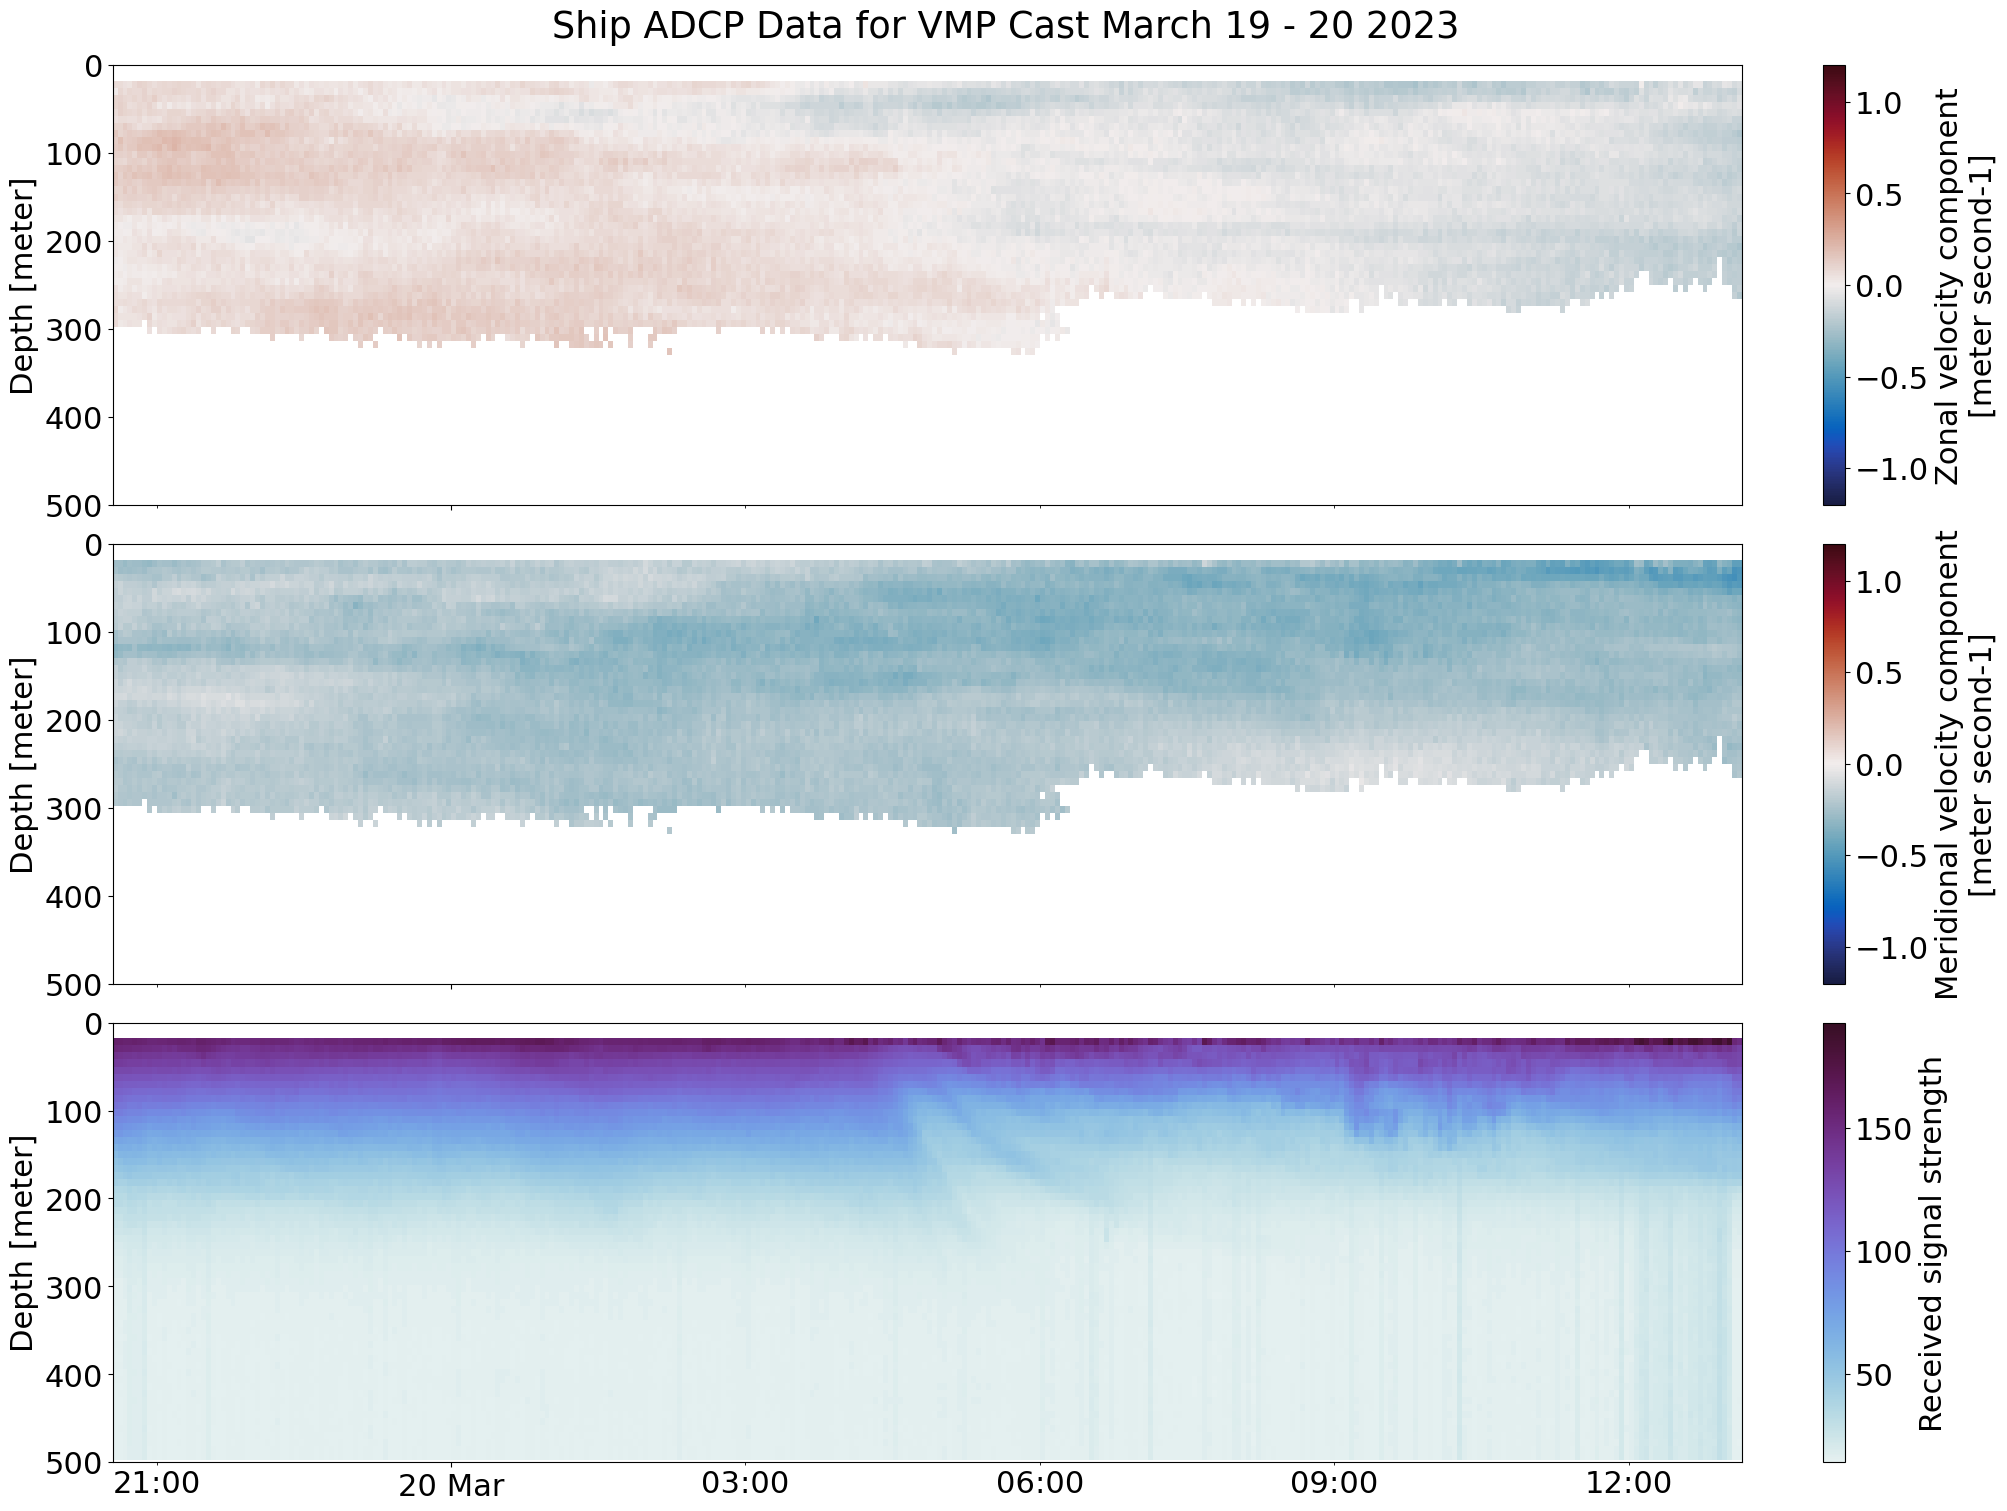

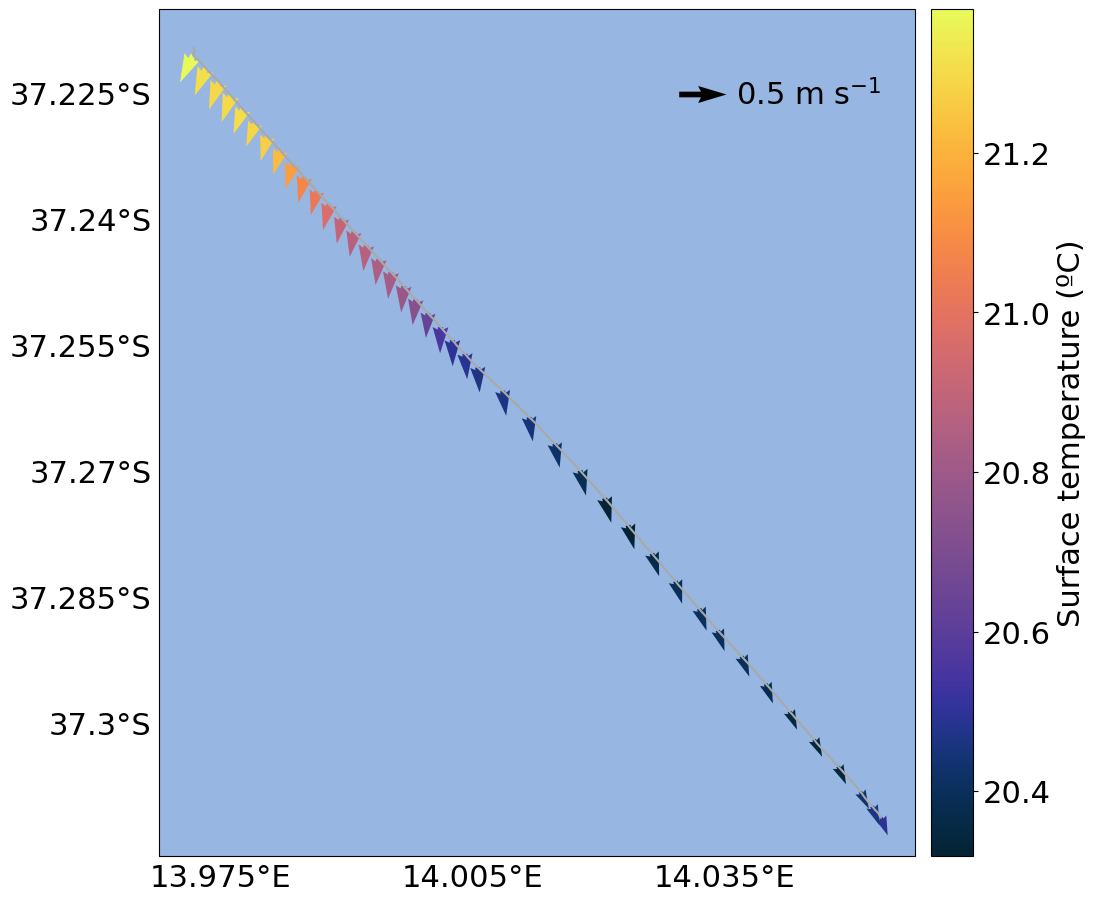

In [8]:
vmp4 = ds.sel(time=slice("2023-03-19T20:34:00", "2023-03-20T13:09:01"))

fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(20,15), sharex= True, constrained_layout = True)

var = ['u', 'v']

for i, vari in enumerate(var):
    vmp4[vari].plot(y="depth", ylim=(500,0), vmin=-1.2, vmax=1.2, cmap="cmo.balance", ax=[ax, bx][i])
    #vmp1.where(vmp1['pg']>85)[vari].plot(y="depth", ylim=(500,0), vmin=-1, vmax=1, cmap="cmo.balance", ax=[ax, bx][i])

vmp4["amp"].plot(y="depth", ylim=(500,0), cmap="cmo.dense", ax=cx)
    
fig.suptitle("Ship ADCP Data for VMP Cast March 19 - 20 2023")
cx.xaxis.set_major_locator(mdates.DayLocator())
cx.xaxis.set_minor_locator(mdates.HourLocator(np.arange(0,24,3)))
cx.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
cx.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
rot_ticks(cx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)
cx.set(xlabel=None)

fig, ax = plt.subplots(figsize=(20,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(vmp4.lon, vmp4.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
quivplt = vmp4.isel(time=np.arange(0,len(vmp4.time),8),
          depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                      y='lat',
                                                      u='u',
                                                      v='v',
                                                      scale=8,
                                                      pivot='tail', #make the arrow pivot on the tail
                                                      hue="tr_temp",
                                                      cmap="cmo.thermal",
                                                        cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)'})
qk = ax.quiverkey(quivplt, 0.75, 0.9, 0.5, '0.5 m s$^{-1}$', labelpos='E',
                   coordinates='axes',zorder=6,color='k')
#ax.set_extent([13.45,13.5,-35.93,-35.96])

VMP Cast 5

<br>
March 22 2023 - 03:26:17 <br>
March 22 2023 - 04:48:07

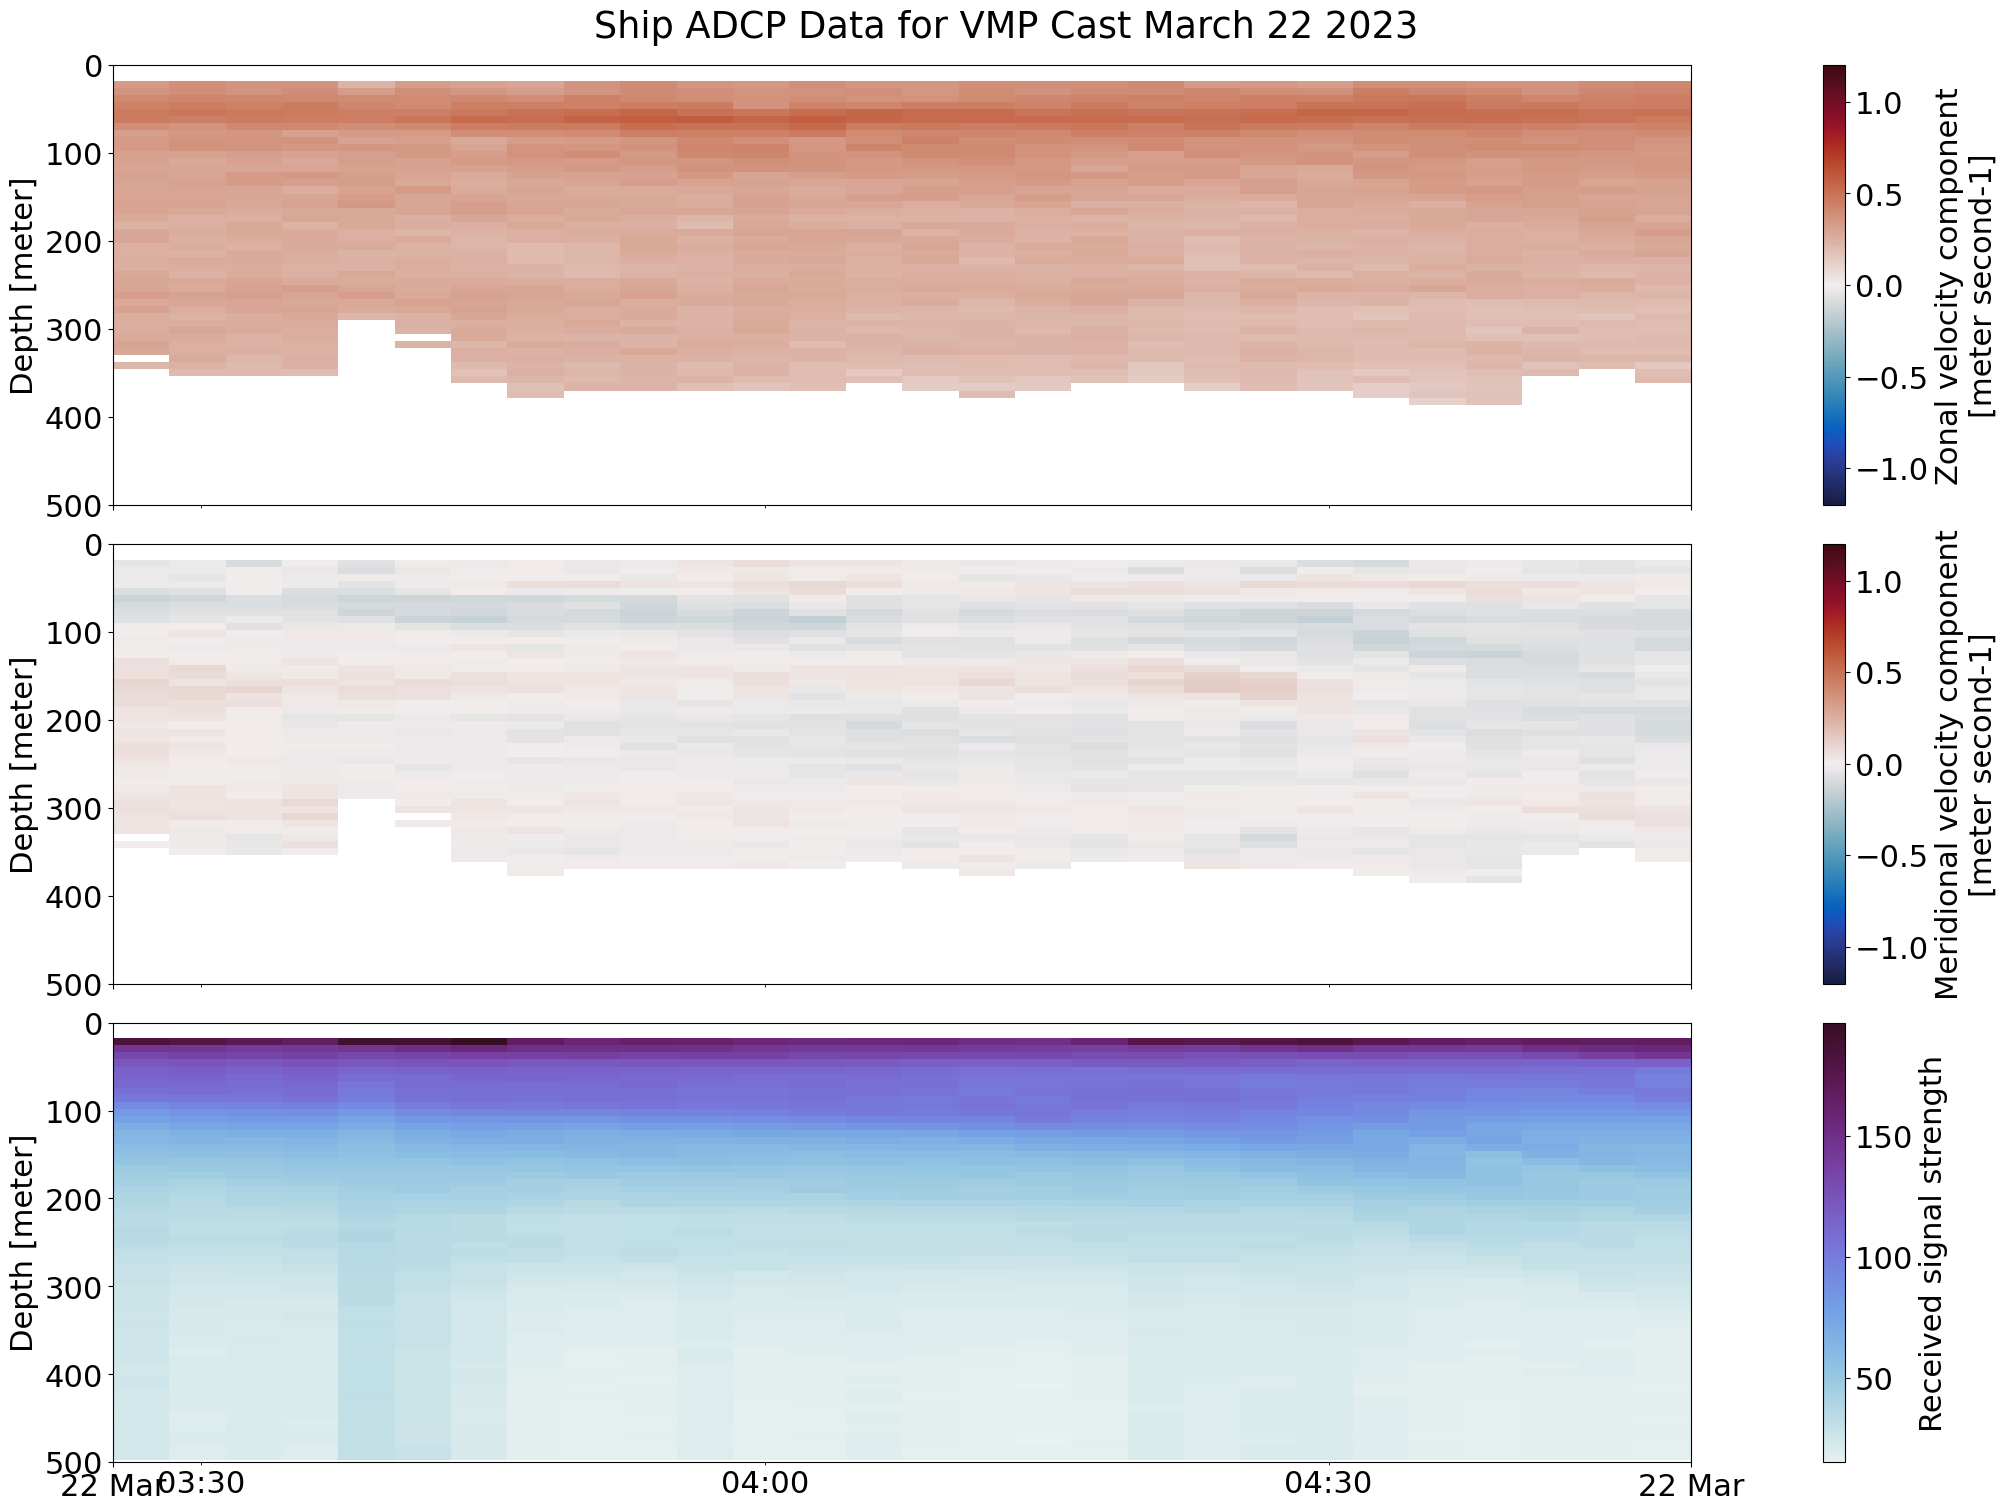

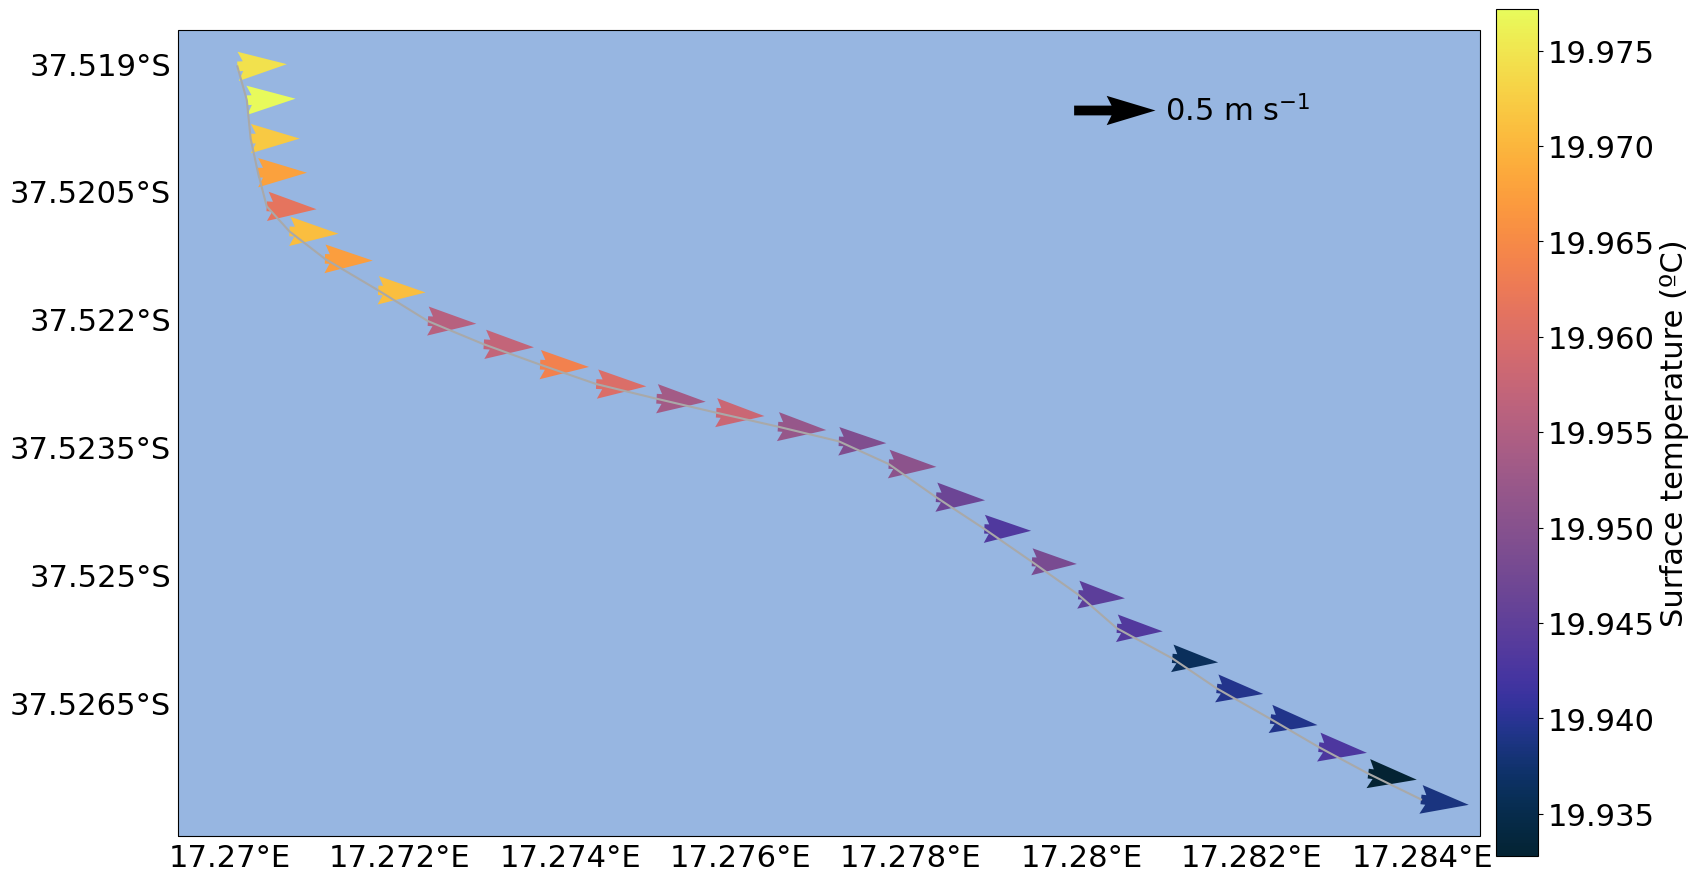

In [9]:
vmp5 = ds.sel(time=slice("2023-03-22T03:26:00", "2023-03-22T04:49:00"))

fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(20,15), sharex= True, constrained_layout = True)

var = ['u', 'v']

for i, vari in enumerate(var):
    vmp5[vari].plot(y="depth", ylim=(500,0), vmin=-1.2, vmax=1.2, cmap="cmo.balance", ax=[ax, bx][i])
    #vmp1.where(vmp1['pg']>85)[vari].plot(y="depth", ylim=(500,0), vmin=-1, vmax=1, cmap="cmo.balance", ax=[ax, bx][i])

vmp5["amp"].plot(y="depth", ylim=(500,0), cmap="cmo.dense", ax=cx)
    
fig.suptitle("Ship ADCP Data for VMP Cast March 22 2023")
cx.xaxis.set_major_locator(mdates.DayLocator())
cx.xaxis.set_minor_locator(mdates.MinuteLocator(np.arange(0,60, 30)))
cx.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
cx.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
rot_ticks(cx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)
cx.set(xlabel=None)

fig, ax = plt.subplots(figsize=(20,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(vmp5.lon, vmp5.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
quivplt = vmp5.isel(time=np.arange(0,len(vmp5.time),1),
          depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                      y='lat',
                                                      u='u',
                                                      v='v',
                                                      scale=8,
                                                      pivot='tail', #make the arrow pivot on the tail
                                                      hue="tr_temp",
                                                      cmap="cmo.thermal",
                                                        cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)'})

qk = ax.quiverkey(quivplt, 0.75, 0.9, 0.5, '0.5 m s$^{-1}$', labelpos='E',
                   coordinates='axes',zorder=6,color='k')
#ax.set_extent([13.45,13.5,-35.93,-35.96])